In [236]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform
from json import *
from tqdm import tqdm

str_format = '05d'

# Генерация точек

$$\large{
5 \ точек \sim U(100, 1000)
}$$

In [237]:
n = 5
X = np.round(uniform.rvs(loc=100, scale=900, size=n), 3)
Y = np.round(uniform.rvs(loc=100, scale=900, size=n), 3)


# DATA2JSON

In [238]:
data = dict()
for i in range(n):
    data[format(i, str_format)] = {'X':X[i], 'Y':Y[i]}
with open("coordinates.json", "w") as outfile:
    json.dump(data, outfile, indent=4)

# JSON2DATA

In [239]:
with open("coordinates.json") as infile:
    data = load(infile)

In [240]:
N = len(data)
X = np.zeros(N)
Y = np.zeros(N)

for i in range(N):
    X[i] = data[format(i, str_format)]['X']
    Y[i] = data[format(i, str_format)]['Y']

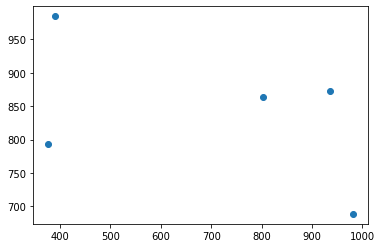

In [241]:
plt.scatter(X,Y)

Схема для построения графа:

$$\Large{
\begin{pmatrix}
\begin{pmatrix}
i-1\\
j+1
\end{pmatrix}&&
\begin{pmatrix}
i\\
j+1
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j+1
\end{pmatrix}\\
\begin{pmatrix}
i-1\\
j
\end{pmatrix}&&
\begin{pmatrix}
i\\
j
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j
\end{pmatrix}\\
\begin{pmatrix}
i-1\\
j-1
\end{pmatrix}&&
\begin{pmatrix}
i\\
j-1
\end{pmatrix}&&
\begin{pmatrix}
i+1\\
j-1
\end{pmatrix}\\
\end{pmatrix}
}$$

In [246]:
graph = dict()

k = 0

X_sort = np.sort(X)
Y_sort = np.sort(Y)

for i in tqdm(range(N)):
    for j in range(N):
        i_t = np.where(X_sort == X[i])[0][0]
        j_t = np.where(Y_sort == Y[j])[0][0]
        if i_t == 0 and j_t == 0:
#             print(X_sort, X, X_sort[i_t], Y[j_t], sep='\n')
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t + 1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t + 1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),
                                   
                                  (X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
        elif i_t == 0 and j_t != 0 and j_t != N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t + 1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t + 1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t + 1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t], Y_sort[j_t - 1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t - 1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t - 1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t - 1] - Y[j])**2)**0.5)}
            
        elif i_t == 0 and j_t == N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            
        elif i_t != 0 and i_t != N-1 and j_t == N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t-1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t+1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            
        elif i_t == N-1 and j_t == N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t-1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5)}
            
        elif i_t == N-1 and j_t != 0 and j_t != N-1:
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t+1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t-1], Y_sort[j_t+1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t-1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t-1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t-1] - Y[j])**2)**0.5)}
            
        elif i_t == N-1 and j_t == 0:
            graph[(X[i], Y[j])] = {(X_sort[i_t], Y_sort[j_t+1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t-1], Y_sort[j_t+1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            
        elif i_t != 0 and i_t != N-1 and j_t == 0:
            graph[(X[i], Y[j])] = {(X_sort[i_t+1], Y_sort[j_t]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5),
                                   
                                   (X_sort[i_t+1], Y_sort[j_t+1]): 
                                   ((X_sort[i_t+1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t], Y_sort[j_t+1]): 
                                   ((X_sort[i_t] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t+1]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t+1] - Y[j])**2)**0.5),
            
                                   (X_sort[i_t-1], Y_sort[j_t]): 
                                   ((X_sort[i_t-1] - X[i])**2 + ((Y_sort[j_t] - Y[j])**2)**0.5)}
            
            
graph

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 7767.23it/s]


{(377.033, 792.721): {(377.033, 862.994): 70.27300000000002,
  (389.924, 862.994): 236.45088099999907,
  (389.924, 792.721): 166.17788099999905,
  (377.033, 688.907): 103.81399999999996,
  (389.924, 688.907): 269.991880999999},
 (377.033, 984.44): {(377.033, 873.254): 111.18600000000004,
  (389.924, 873.254): 277.3638809999991,
  (389.924, 984.44): 166.17788099999905},
 (377.033, 862.994): {(377.033, 873.254): 10.259999999999991,
  (389.924, 873.254): 176.43788099999904,
  (389.924, 862.994): 166.17788099999905,
  (377.033, 792.721): 70.27300000000002,
  (389.924, 792.721): 236.45088099999907},
 (377.033, 688.907): {(377.033, 792.721): 103.81399999999996,
  (389.924, 792.721): 269.991880999999,
  (389.924, 688.907): 166.17788099999905},
 (377.033, 873.254): {(377.033, 984.44): 111.18600000000004,
  (389.924, 984.44): 277.3638809999991,
  (389.924, 873.254): 166.17788099999905,
  (377.033, 862.994): 10.259999999999991,
  (389.924, 862.994): 176.43788099999904},
 (389.924, 984.44): {(377

array([377.033, 377.033, 377.033, 377.033, 377.033, 389.924, 803.072,
       935.905, 981.023, 981.023, 981.023, 981.023, 981.023])

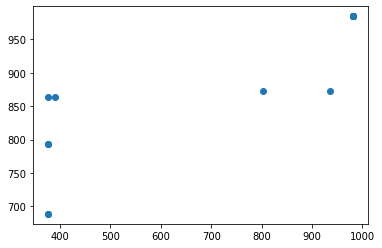

In [243]:
plot_data = np.array(list(graph.keys()))
X_new = plot_data[:, 0]
Y_new = plot_data[:, 1]
plt.scatter(np.sort(X_new), np.sort(Y_new))
np.sort(X_new)

In [244]:
test = np.array([[1,2,3,4],
                 [5,6,7,8]])
